<a href="https://colab.research.google.com/github/Baobui19112001/BaiTapCNN/blob/main/Traicay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [ ]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/PhanLoaiTraiCay/Train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/PhanLoaiTraiCay/Validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 101 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
validation_dataset.class_indices 


{'Coc': 0,
 'Dua': 1,
 'Luu': 2,
 'Man': 3,
 'Mangcut': 4,
 'Mit': 5,
 'Saurieng': 6,
 'Tao': 7,
 'Vusua': 8,
 'Xoai': 9}

In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=50,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/50
11/11 [==============================] - 13s 1s/step - loss: 1.5145 - accuracy: 0.4950
Epoch 2/50
11/11 [==============================] - 14s 1s/step - loss: 1.3774 - accuracy: 0.4554
Epoch 3/50
11/11 [==============================] - 13s 1s/step - loss: 1.3778 - accuracy: 0.4752
Epoch 4/50
11/11 [==============================] - 14s 1s/step - loss: 1.3159 - accuracy: 0.4653
Epoch 5/50
11/11 [==============================] - 14s 1s/step - loss: 1.4617 - accuracy: 0.5248
Epoch 6/50
11/11 [==============================] - 13s 1s/step - loss: 1.5026 - accuracy: 0.4653
Epoch 7/50
11/11 [==============================] - 13s 1s/step - loss: 1.3746 - accuracy: 0.4851
Epoch 8/50
11/11 [==============================] - 13s 1s/step - loss: 1.6589 - accuracy: 0.4158
Epoch 9/50
11/11 [==============================] - 13s 1s/step - loss: 1.1638 - accuracy: 0.6040
Epoch 10/50
11/11 [==============================] - 13s 1s/step - loss: 1.1634 - accuracy: 0.5842
Epoch 11/50
11/11 [

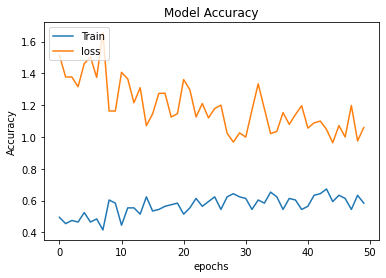

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
model.save('phanloaitraicay.h5')

In [ ]:
classes=['Coc',
 'Dua',
 'Luu',
 'Man',
 'Mangcut',
 'Mit',
 'Sau rieng',
 'Tao',
 'Vu sua',
 'Xoai']

Xoai


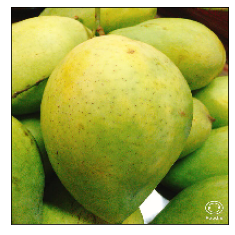

In [ ]:
filename = '/content/drive/MyDrive/AI/PhanLoaiTraiCay/Validation/Xoai/traixoai (3).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Man


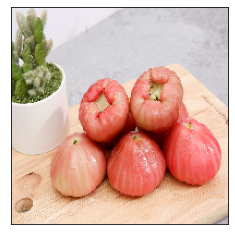

In [ ]:
filename = '/content/drive/MyDrive/AI/PhanLoaiTraiCay/Validation/Man/traiman (3).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Vu sua


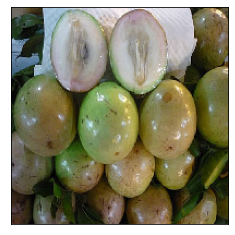

In [ ]:
filename = '/content/drive/MyDrive/AI/PhanLoaiTraiCay/Validation/Vusua/traivusua (3).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])